In [1]:
# Imports
import pandas as pd
import numpy as np
import sys
sys.path.append('../src')
from preprocessing import PCA_credit_data
from model import score_anomaly, show_reconstruction, main

########
PCA Results:
----
Input Components = 32
Reconstruction Threshold = 0.5

1009 Anomalies found
0.16 % anomaly rate across all transactions


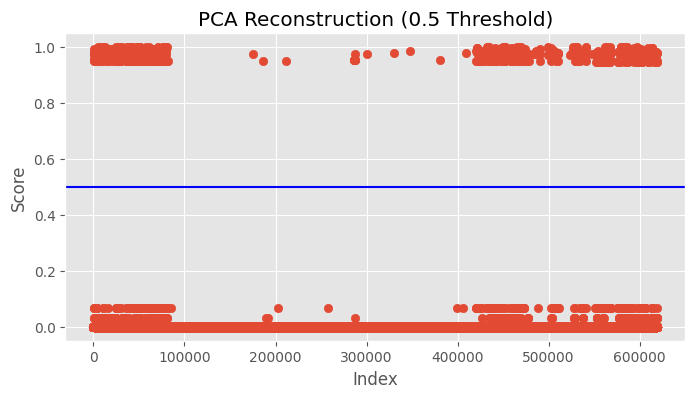

In [2]:
main()

## Full PCA Analysis
----

In [3]:
#Load in clean data
clean = pd.read_pickle('../data/clean-credit.pkl')
clean.head()

,amount,month,day,year,weekday,voucher,contract,vendid,cashed_flag,dept_administrative_adjudication,...,dept_office_of_cable_communication_adm,dept_office_of_compliance,dept_office_of_emergency_communication,dept_office_of_inspector_general,dept_office_of_special_events,dept_office_of_the_mayor,dept_ohare_modernization_project,dept_planning_&_development,dept_police_board,dept_unknown
0,270.00,1,2,2018,1,106161.0,61468.0,312479.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
1,15426.00,1,2,2018,1,2130.0,15524.0,127781.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,170.19,1,2,2018,1,48176.0,61468.0,317211.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
3,4360.12,1,2,2018,1,379.0,15366.0,107242.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
4,3407.54,1,2,2018,1,2009.0,14768.0,257458.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
resd = {
    'n_components':[],
    'n_anomalies':[],
}
losses = []

for n in [20, 30, 32, 33, 40, 50]:
    pca1, pca_inv = PCA_credit_data(n, clean)
    loss = score_anomaly(clean, pca_inv)
    anoms = len(np.where(loss > 0.5)[0])

    resd['n_components'].append(n)
    resd['n_anomalies'].append(anoms)
    losses.append(loss)

res_df = pd.DataFrame(resd)
res_df['pct_anomaly'] = (res_df['n_anomalies'] / len(clean)) * 100
('Anomalies detected for a given number of PCA Components')
display(res_df)

Seeing that 32 components return the closest percent to an average fraudulent transaction, we can visualize the reconstruction

In [ ]:
show_reconstruction(losses[2])

Reducing the number of components will find more anomalies. The same goes for reducing the threshold of the reconstruction score. Since we are looking for fraud, it may be best to reduce the components or the threshold so that we can also investigate fraud that is only *slightly* anomalous.